# AP Scores and Demographics: A Data Visualization Project

For my PWR essays, I studied extensively the roots of standardized testing, tracing it back to the early 20th century eugenics movement. Using this data set from Kaggle.com, I will attempt to verify professor Wayne Au's observation of the "zip code effect." As I wrote in a previous paper, "Most disturbing in his work, though, was a phenomenon he calls “the zip code effect”; Au states that in Berkeley High School in California, 'graduation rates, grade point averages, discipline rates, dropout rates, and standardized test scores could be relatively accurately predicted by a simple analysis of where in the city of Berkeley a particularly child lived.' This simple number, a number that helps the post office locate where to deliver mail, also provides the following: geographical demarcation of different neighborhoods, which generally have distinct racial and socioeconomic demographics."

For my project, I will be working with a large data set and producing different visualizations of the data.

In [1]:
from __future__ import print_function, division
import pandas as pd
from pandas.plotting import scatter_matrix
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import scipy.optimize as opt
from matplotlib.backends.backend_pdf import PdfPages

### Loading the Data:

In [2]:
examdata = pd.read_csv("new_exams.csv")
examdata.convert_objects(convert_numeric=True)

/Users/ChristianHaroldNunez/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:2: FutureWarning: convert_objects is deprecated.  To re-infer data dtypes for object columns, use DataFrame.infer_objects()
For all other conversions use the data-type specific converters pd.to_datetime, pd.to_timedelta and pd.to_numeric.
  


,Exam Subject,Score,Students (White),Students (Black),Students (Hispanic/Latino),Students (Asian),Students (American Indian/Alaska Native),Students (Native Hawaiian/Pacific Islander),Students (Two or More Races),All Students (2016)
0,ART HISTORY,5.0,1631.00,34.00,321.00,514.00,5.00,5.00,154.00,2704.00
1,ART HISTORY,4.0,3290.00,132.00,918.00,877.00,13.00,8.00,273.00,5587.00
2,ART HISTORY,3.0,3898.00,287.00,1347.00,992.00,19.00,10.00,307.00,6940.00
3,ART HISTORY,2.0,3211.00,450.00,1972.00,809.00,15.00,21.00,280.00,6868.00
4,ART HISTORY,1.0,942.00,307.00,1074.00,292.00,13.00,10.00,87.00,2771.00
5,ART HISTORY,NaN,12972.00,1210.00,5632.00,3484.00,65.00,54.00,1101.00,24870.00
6,ART HISTORY,NaN,3.11,2.29,2.55,3.15,2.72,2.57,3.12,2.94
7,BIOLOGY,5.0,8585.00,153.00,788.00,4443.00,11.00,7.00,733.00,14894.00
8,BIOLOGY,4.0,29999.00,976.00,3966.00,10367.00,75.00,49.00,2139.00,48187.00
9,BIOLOGY,3.0,46377.00,3305.00,10511.00,13051.00,183.00,97.00,3477.00,77936.00


In [3]:
# Creating a numpy array of all of the 37 classes.
classnames = []
all_classes = []
for i in range(0, 37):
    start = 7 * i
    stop = start + 5
    this_class = []
    classnames.append(examdata.iloc[start,0])
    for j in range(2, 9):
        this_class.append(examdata.iloc[start:stop,j])
    all_classes.append(this_class)
    
all_classes = np.asarray(all_classes)

# Getting the total for each demographic for each test
totals = []
for i in range(0, 37):
    start = 5 + 7 * i
    this_total = []
    for j in range(2, 9):
        this_total.append(examdata.iloc[start][j])
    totals.append(this_total)

Now that I have created a numpy array of all 37 classes, I can create the first visual: stacked bar charts (not normalized) for every class (including every demographic). These will be saved as the following: "stacked-CLASSNAME-abnormal" 

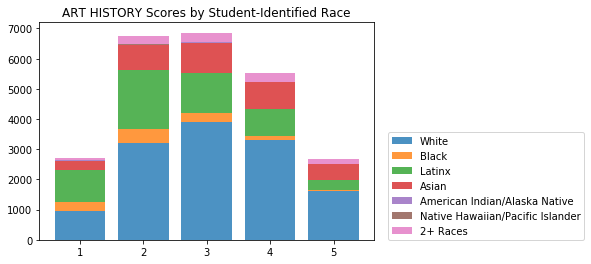

In [6]:
# Function to created a stacked bar chart
def stacked_bar(xvalues, yvalues, legend_names, ax):
    bottomTracker = 0
    for i in range (0, len(yvalues)):
        ax.bar(xvalues, yvalues[i], label = legend_names[i], bottom = bottomTracker, alpha=0.8)
        bottomTracker += yvalues[i]
    return ax

def save_stacked(scores, this_class, classnames, i):
    legend_names = np.array(["White", "Black", "Latinx", "Asian", "American Indian/Alaska Native", "Native Hawaiian/Pacific Islander", "2+ Races"])
    fig, ax = plt.subplots(1,1)
    ax1 = stacked_bar(scores, this_class, legend_names, ax)
    plt.title(classnames[i]  + " Scores by Student-Identified Race")
    plt.legend(loc=(1.04,0))
    filename = "stacked0"
    plt.savefig(filename, dpi=100)

scores = np.array([5, 4, 3, 2, 1])
save_stacked(scores, all_classes[0].astype('float64'), classnames, 0)

class  5  created an error
class  14  created an error
class  18  created an error
class  19  created an error
class  20  created an error


/Users/ChristianHaroldNunez/anaconda2/lib/python2.7/site-packages/matplotlib/pyplot.py:528: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


class  27  created an error
class  28  created an error
class  30  created an error
class  32  created an error
class  33  created an error


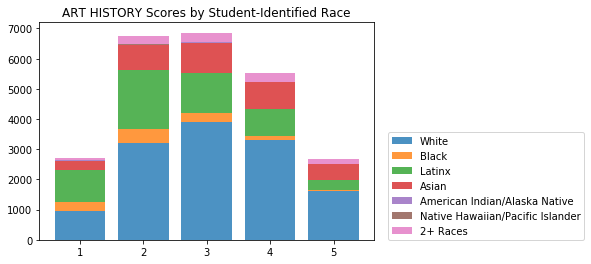

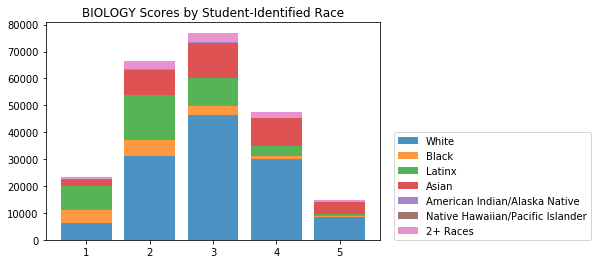

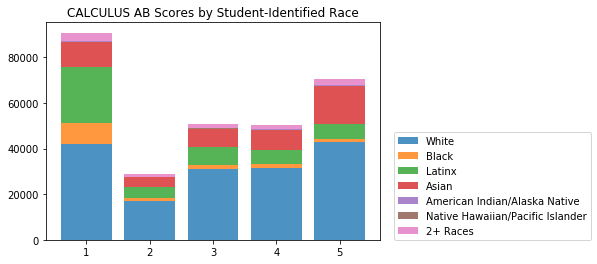

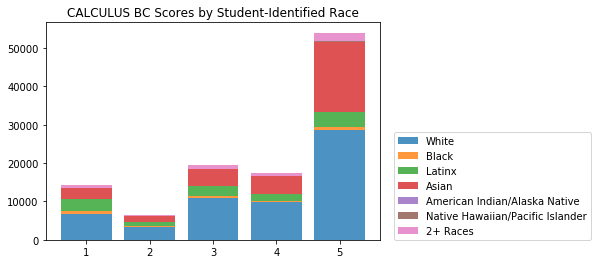

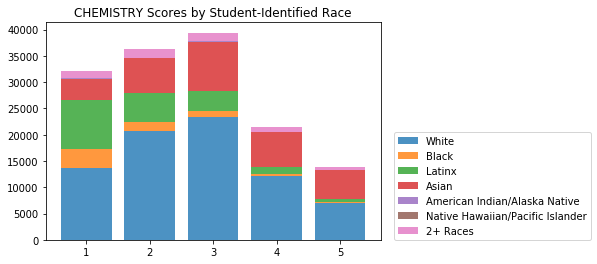

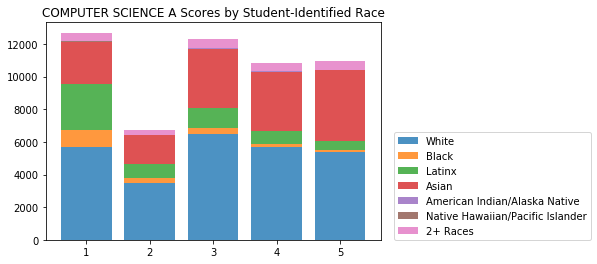

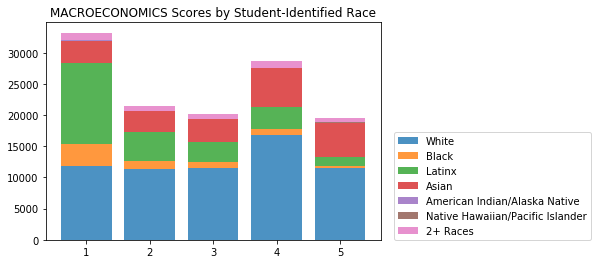

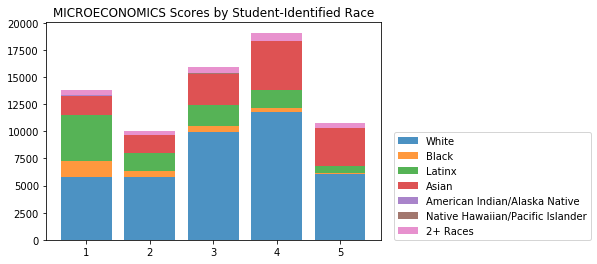

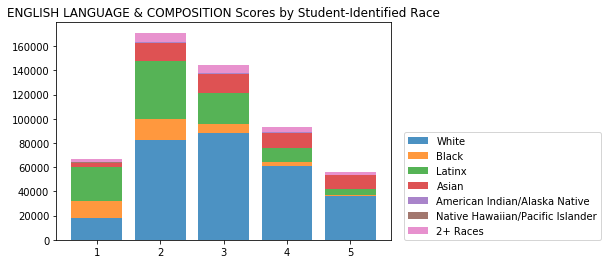

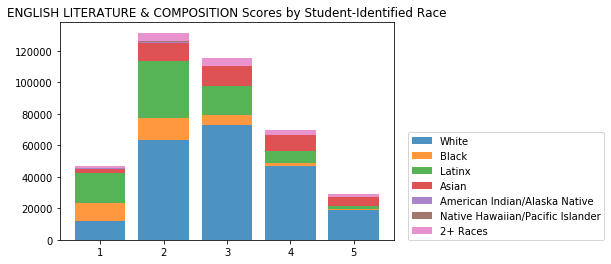

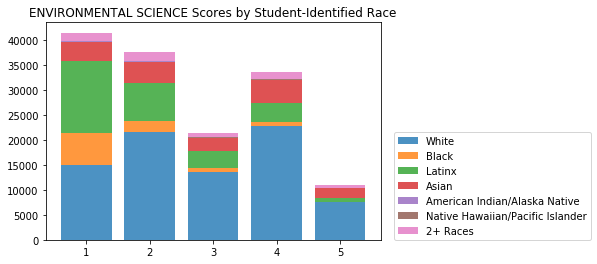

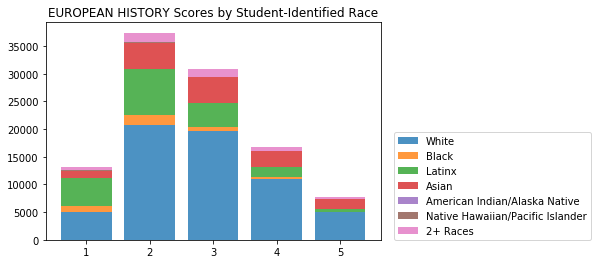

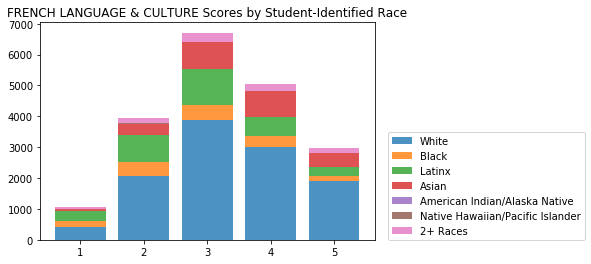

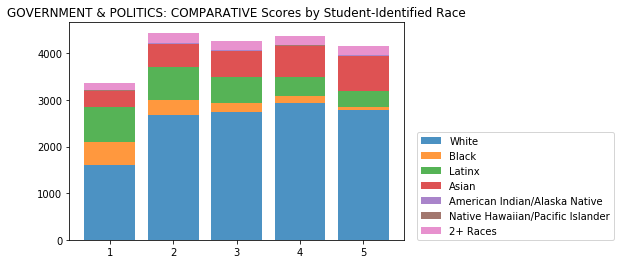

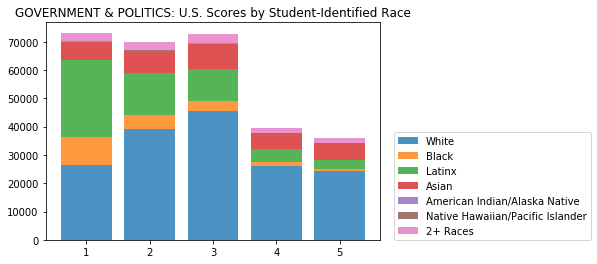

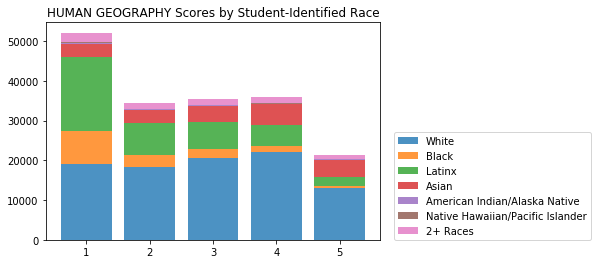

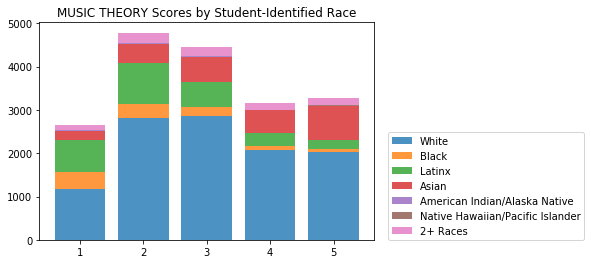

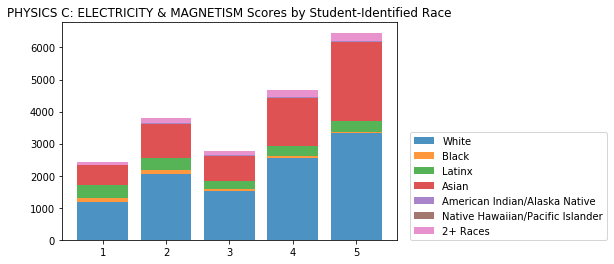

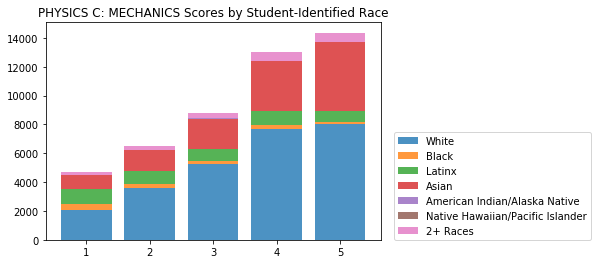

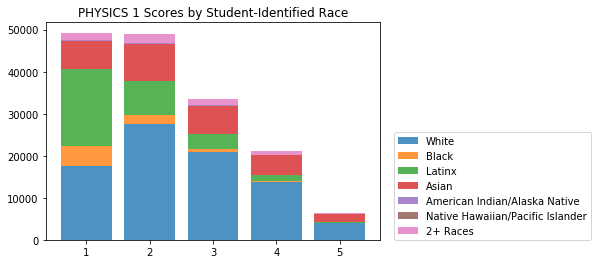

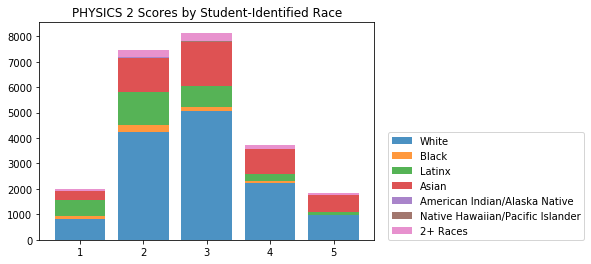

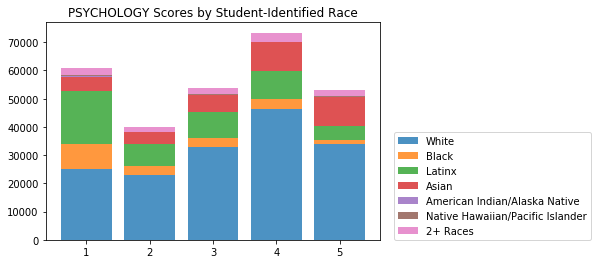

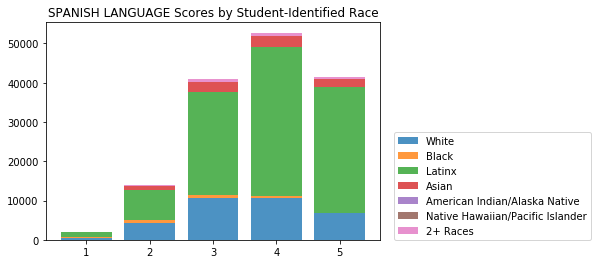

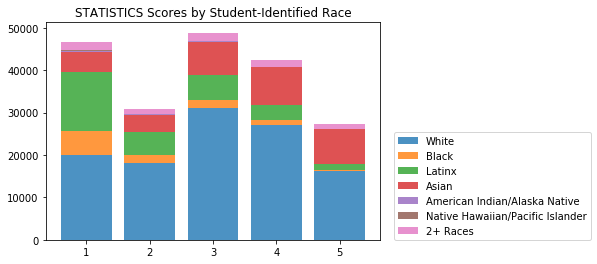

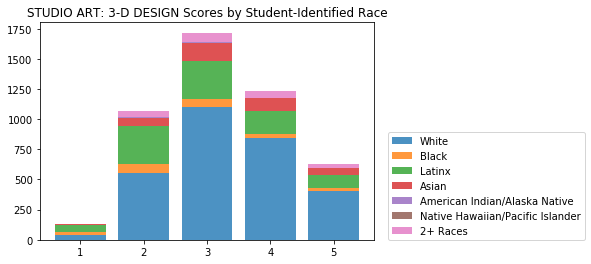

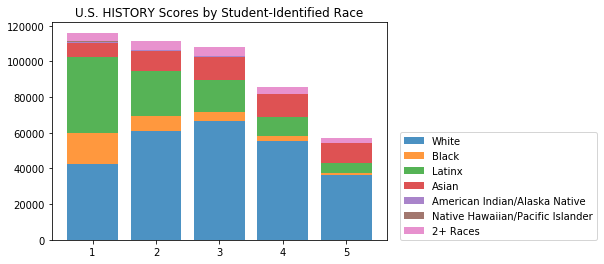

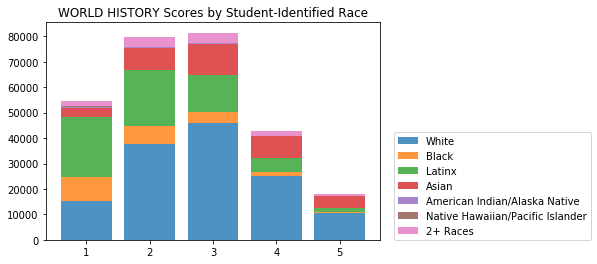

In [12]:
nrows, ncols = 3, 3
fig = plt.figure()    
for i in range(0,37):
    try:
        save_stacked(scores, all_classes[i].astype("float64"), classnames, i)
    except ValueError:
        print("class ", i, " created an error")

plt.show()

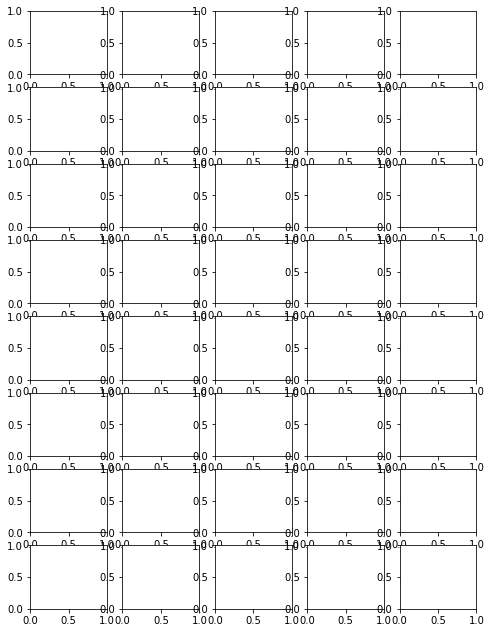

In [106]:
f, ax = plt.subplots(8,5)
f.set_size_inches(8,11)

In [ ]:
f, axes = plt.subplots
axarr = np.ndarray.flatten(axes)

for ax in axarr:
    ax.plot
    


[5    12972.0
 Name: Students (White), dtype: float64, 5    1210
 Name: Students (Black), dtype: object, 5    5632.0
 Name: Students (Hispanic/Latino), dtype: float64, 5    3484.0
 Name: Students (Asian), dtype: float64, 5    65
 Name: Students (American Indian/Alaska Native), dtype: object, 5    54
 Name: Students (Native Hawaiian/Pacific Islander), dtype: object, 5    1101.0
 Name: Students (Two or More Races), dtype: float64]

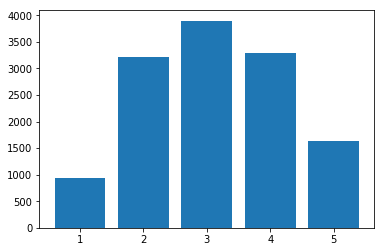

In [62]:

plt.bar(scores, all_classes[0][0].astype("float64"))

totals[0]
#plt.bar(scores, all_classes[0][1])

### Exploring the Calculus BC Dataframe

In [3]:
# As a test for the rest of the project, I will first look
# the calc BC data set and see what methods of analysis are appropriate.
calcBC = examdata.iloc[21:27, :]
calcBC

,Exam Subject,Score,Students (White),Students (Black),Students (Hispanic/Latino),Students (Asian),Students (American Indian/Alaska Native),Students (Native Hawaiian/Pacific Islander),Students (Two or More Races),All Students (2016)
21,CALCULUS BC,5,28740.0,764,3749.0,18354.0,47,44,2281.0,54660.0
22,CALCULUS BC,4,9814.0,403,1815.0,4577.0,26,26,720.0,17557.0
23,CALCULUS BC,3,10878.0,615,2411.0,4569.0,35,29,836.0,19589.0
24,CALCULUS BC,2,3453.0,274,981.0,1476.0,19,14,271.0,6558.0
25,CALCULUS BC,1,6612.0,913,3086.0,2917.0,35,18,592.0,14331.0
26,CALCULUS BC,All,59497.0,2969,12042.0,31893.0,162,131,4700.0,112695.0


In [42]:
# Plan: Make a histogram over the scores 
scores = np.array([1, 2, 3, 4, 5])
calcBC_white = examdata.iloc[21:26,2].astype('float64')
calcBC_black = examdata.iloc[21:26,3].astype('float64')
calcBC_latinx = examdata.iloc[21:26,4].astype('float64') 
calcBC_asian = examdata.iloc[21:26,5].astype('float64') 
calcBC_aian = examdata.iloc[21:26,6].astype('float64') 
calcBC_nhpi = examdata.iloc[21:26,7].astype('float64')
calcBC_2ormore = examdata.iloc[21:26,8].astype('float64') 

calc_classes = np.array([calcBC_white, calcBC_black, calcBC_latinx, calcBC_asian,
               calcBC_aian, calcBC_nhpi, calcBC_2ormore])

pandas.core.series.Series

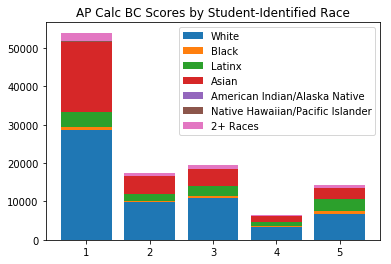

In [95]:
legend_names = np.array(["White", "Black", "Latinx", "Asian", "American Indian/Alaska Native", "Native Hawaiian/Pacific Islander", "2+ Races"])
fig, ax = plt.subplots(1,1)
ax1 = stacked_bar(scores, calc_classes, legend_names, ax)
plt.title("AP Calc BC Scores by Student-Identified Race")
plt.legend()
plt.show()

TypeError: object of type 'float' has no len()

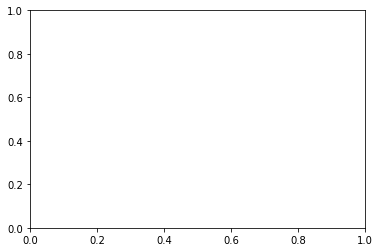

In [120]:
legend_names = np.array(["White", "Black", "Latinx", "Asian", "American Indian/Alaska Native", "Native Hawaiian/Pacific Islander", "2+ Races"])
fig, ax = plt.subplots(1,1)
ax1 = stacked_bar(scores, all_classes[0], legend_names, ax)
plt.title("AP Calc BC Scores by Student-Identified Race")
plt.legend()
plt.show()

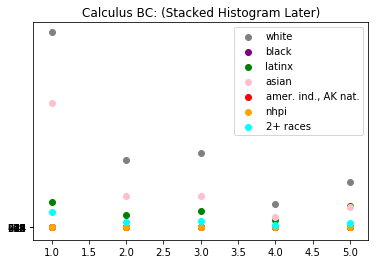

In [5]:
plt.title("Calculus BC: (Stacked Histogram Later)")
plt.scatter(scores, calcBC_white, color="grey", label = "white")
plt.scatter(scores, calcBC_black, color="purple", label = "black")
plt.scatter(scores, calcBC_latinx, color="green", label = "latinx")
plt.scatter(scores, calcBC_asian, color="pink", label = "asian")
plt.scatter(scores, calcBC_aian, color="red", label = "amer. ind., AK nat.")
plt.scatter(scores, calcBC_nhpi, color="orange", label = "nhpi")
plt.scatter(scores, calcBC_2ormore, color="cyan", label = "2+ races")
plt.legend()
plt.show()

# I want to convert these all to frequency and then create a stacked histogram. However, some of the series seem
# to be series of strings, making things difficult. This plot will be edited in the future.

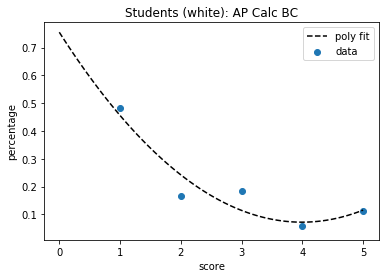

Poly fit params:  [ 0.04283649 -0.34209384  0.75508009]


In [6]:
# Converting to frequency:
calcBC_white_f = calcBC_white / 59497.0
plt.title("Students (white): AP Calc BC")
plt.xlabel("score")
plt.ylabel("percentage")
plt.scatter(scores, calcBC_white_f, label = "data")

# Preliminary polynomial fit
# More advanced fits to come
def poly(x, a, b, c):
    return a*x**2 + b*x + c

params, cov = opt.curve_fit(poly, scores, calcBC_white_f)
xarr = np.linspace(0,5, num=100)
plt.plot(xarr, poly(xarr, *params), "k--", label="poly fit")
plt.legend()
plt.show()
print("Poly fit params: ", params)

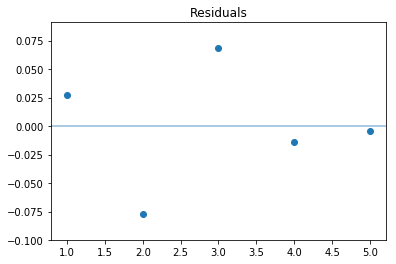

In [7]:
# Residual plots for the above calculation:
res = calcBC_white_f - poly(scores, *params)
plt.scatter(scores, res)
plt.title("Residuals")
plt.axhline(0, 0, 1, alpha = 0.5)
plt.show()

I need to look into ways to approach this sort of dataset. If you have any suggestions, please let me know. The above polynomial fit seems a little naive for discrete bins like these.